In [2]:
import pandas as pd
import requests
import json
import sqlite3
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re as re
import seaborn as sns

In [2]:
url = 'https://graphql.anilist.co'

In [3]:
# Here we define our query as a multi-line string
query = '''
query Query($type: MediaType, $status: MediaStatus, $page: Int, $isAdult: Boolean) {
  Page(page: $page) {
    pageInfo {
      currentPage
      hasNextPage
    }
    media(type: $type, status: $status, isAdult: $isAdult) {
      id
      title {
        english
        romaji
      }
      type
      format
      status
      seasonYear
      source
      genres
      popularity
      tags {
        name
      }
    }
  }
}
'''
variables={
  "type" : 'ANIME',
  "format": 'TV',
  "page" : 1,
  "isAdult" : False
}

response = requests.post(url, json={'query': query,'variables': variables}) # Make the HTTP Api request

In [4]:
json = response.json() #convert response to json
json.keys() #find keys

dict_keys(['data'])

In [5]:
df = pd.json_normalize(json['data']) #flatten db
df

,Page.pageInfo.currentPage,Page.pageInfo.hasNextPage,Page.media
0,1,True,"[{'id': 1, 'title': {'english': 'Cowboy Bebop'..."


In [6]:
df['Page.pageInfo.hasNextPage'][0]

np.True_

In [7]:
df_1 = pd.json_normalize(df['Page.media']).T #flatten db and transform
df_1

,0
0,"{'id': 1, 'type': 'ANIME', 'format': 'TV', 'st..."
1,"{'id': 5, 'type': 'ANIME', 'format': 'MOVIE', ..."
2,"{'id': 6, 'type': 'ANIME', 'format': 'TV', 'st..."
3,"{'id': 7, 'type': 'ANIME', 'format': 'TV', 'st..."
4,"{'id': 8, 'type': 'ANIME', 'format': 'TV', 'st..."
5,"{'id': 15, 'type': 'ANIME', 'format': 'TV', 's..."
6,"{'id': 16, 'type': 'ANIME', 'format': 'TV', 's..."
7,"{'id': 17, 'type': 'ANIME', 'format': 'TV', 's..."
8,"{'id': 18, 'type': 'ANIME', 'format': 'TV', 's..."
9,"{'id': 19, 'type': 'ANIME', 'format': 'TV', 's..."


In [8]:
df_2 = pd.json_normalize(df_1[0]) #final flaten db
df_2

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english,title.romaji
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop,Cowboy Bebop
1,5,ANIME,MOVIE,FINISHED,2001,ORIGINAL,"[Action, Drama, Mystery, Sci-Fi]",70408,"[{'name': 'Terrorism'}, {'name': 'Primarily Ad...",Cowboy Bebop: The Movie - Knockin' on Heaven's...,Cowboy Bebop: Tengoku no Tobira
2,6,ANIME,TV,FINISHED,1998,MANGA,"[Action, Adventure, Comedy, Drama, Sci-Fi]",136730,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun,TRIGUN
3,7,ANIME,TV,FINISHED,2002,ORIGINAL,"[Action, Drama, Mystery, Supernatural]",18657,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN,Witch Hunter ROBIN
4,8,ANIME,TV,FINISHED,2004,MANGA,"[Adventure, Fantasy, Supernatural]",2613,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster,Bouken Ou Beet
5,15,ANIME,TV,FINISHED,2005,MANGA,"[Action, Comedy, Sports]",29072,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21,Eyeshield 21
6,16,ANIME,TV,FINISHED,2005,MANGA,"[Comedy, Drama, Romance, Slice of Life]",50435,"[{'name': 'Coming of Age'}, {'name': 'Josei'},...",Honey and Clover,Hachimitsu to Clover
7,17,ANIME,TV,FINISHED,2002,MANGA,"[Comedy, Slice of Life, Sports]",4161,"[{'name': 'Football'}, {'name': 'Shounen'}, {'...",None,Hungry Heart: Wild Striker
8,18,ANIME,TV,FINISHED,2004,MANGA,"[Action, Drama, Sports]",40150,"[{'name': 'Cars'}, {'name': 'Rural'}, {'name':...",Initial D 4th Stage,Initial D FOURTH STAGE
9,19,ANIME,TV,FINISHED,2004,MANGA,"[Drama, Horror, Mystery, Psychological, Thriller]",257176,"[{'name': 'Crime'}, {'name': 'Seinen'}, {'name...",Monster,MONSTER


In [9]:
df_2.explode('tags') #seperate by tags


,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english,title.romaji
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,{'name': 'Space'},Cowboy Bebop,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,{'name': 'Crime'},Cowboy Bebop,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,{'name': 'Episodic'},Cowboy Bebop,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,{'name': 'Ensemble Cast'},Cowboy Bebop,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,{'name': 'Primarily Adult Cast'},Cowboy Bebop,Cowboy Bebop
...,...,...,...,...,...,...,...,...,...,...,...
49,68,ANIME,TV,FINISHED,2005,MANGA,"[Adventure, Comedy, Sci-Fi]",35516,{'name': 'Tragedy'},Black Cat,Black Cat
49,68,ANIME,TV,FINISHED,2005,MANGA,"[Adventure, Comedy, Sci-Fi]",35516,{'name': 'Shounen'},Black Cat,Black Cat
49,68,ANIME,TV,FINISHED,2005,MANGA,"[Adventure, Comedy, Sci-Fi]",35516,{'name': 'Primarily Adult Cast'},Black Cat,Black Cat
49,68,ANIME,TV,FINISHED,2005,MANGA,"[Adventure, Comedy, Sci-Fi]",35516,{'name': 'Male Protagonist'},Black Cat,Black Cat


In [222]:
#test for different page
query = '''
 query Query($type: MediaType, $status: MediaStatus, $page: Int, $isAdult: Boolean) {
    Page(page: $page) {
      pageInfo {
        currentPage
        hasNextPage
      }
      media(type: $type, status: $status, isAdult: $isAdult) {
        id
        title {
          english
          romaji
        }
        type
        format
        status
        seasonYear
        source
        genres
        popularity
        tags {
          name
        }
      }
    }
  }
'''
variables={
  "type" : 'ANIME',
    "status": 'FINISHED',
    "page" : 203,
    "isAdult" : False
}

response2 = requests.post(url, json={'query': query,'variables': variables}) # Make the HTTP Api request
json2 = response2.json()
df_3 = pd.json_normalize(json2['data'])
df_4 = pd.json_normalize(df_3['Page.media']).T
df_5 = pd.json_normalize(df_4[0])
df_5
df_6 = pd.concat([df_2,df_5])
df_5

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english,title.romaji
0,103483,ANIME,MUSIC,FINISHED,None,ORIGINAL,[],150,[],None,REVENGE OF GREEN MUTANT
1,103484,ANIME,MUSIC,FINISHED,None,None,[Fantasy],131,[{'name': 'Mermaid'}],None,Ningyo no Hanashi
2,103485,ANIME,MUSIC,FINISHED,None,ORIGINAL,[],265,[],None,Dracula no Uta
3,103486,ANIME,MUSIC,FINISHED,None,ORIGINAL,[],149,[],None,Koisuru Niwatori
4,103487,ANIME,MUSIC,FINISHED,None,ORIGINAL,[],188,[],None,Love Will Find the Way Back Home
5,103488,ANIME,MUSIC,FINISHED,None,None,[],119,[],None,Lina Poe Poe
6,103489,ANIME,ONA,FINISHED,None,None,[Music],105,[],None,Mr. Shape: High Touch Taisou
7,103490,ANIME,MOVIE,FINISHED,None,None,[Drama],198,[],Spotlight,Sarasoujuu no Hana no Iro
8,103491,ANIME,MUSIC,FINISHED,None,ORIGINAL,[],119,[],None,Grasshopper Monogatari
9,103492,ANIME,MOVIE,FINISHED,None,None,[],271,[],Phenakistoscope,Odoroki Ban


In [11]:
#function to return page
def anilist(i):
  query= '''
  query Query($type: MediaType, $status: MediaStatus, $page: Int, $isAdult: Boolean) {
    Page(page: $page) {
      pageInfo {
        currentPage
        hasNextPage
      }
      media(type: $type, status: $status, isAdult: $isAdult) {
        id
        title {
          english
          romaji
        }
        type
        format
        status
        seasonYear
        source
        genres
        popularity
        tags {
          name
        }
      }
    }
  }
  ''' 
  variables={
    "type" : 'ANIME',
    "status": 'FINISHED',
    "page" : i,
    "isAdult" : False
  }
  response = requests.post(url, json={'query': query,'variables': variables}) # Make the HTTP Api request
  json = response.json()
  df = pd.json_normalize(json['data'])
  return df

In [12]:
# Function to loop all pages and append to data frame
def anilist_compile(i):
    result = pd.DataFrame()
    while True:
        df = anilist(i)
        if df['Page.pageInfo.hasNextPage'][0] == np.True_:
            print(i)
            df_1 = pd.json_normalize(df['Page.media']).T
            df_2 = pd.json_normalize(df_1[0])
            result = pd.concat([result,df_2], axis=0)
            i += 1
            time.sleep(3)
        else:
            df_1 = pd.json_normalize(df['Page.media']).T
            df_2 = pd.json_normalize(df_1[0])
            result = pd.concat([result,df_2], axis=0)
            break
    return result

In [13]:
test = anilist_compile(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


C:\Users\Leolion023\AppData\Local\Temp\ipykernel_108840\2883785947.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result,df_2], axis=0)


202
203


C:\Users\Leolion023\AppData\Local\Temp\ipykernel_108840\2883785947.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result,df_2], axis=0)


204
205
206
207


C:\Users\Leolion023\AppData\Local\Temp\ipykernel_108840\2883785947.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result,df_2], axis=0)


208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367


In [14]:
test

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english,title.romaji
0,1,ANIME,TV,FINISHED,1998.0,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop,Cowboy Bebop
1,5,ANIME,MOVIE,FINISHED,2001.0,ORIGINAL,"[Action, Drama, Mystery, Sci-Fi]",70408,"[{'name': 'Terrorism'}, {'name': 'Primarily Ad...",Cowboy Bebop: The Movie - Knockin' on Heaven's...,Cowboy Bebop: Tengoku no Tobira
2,6,ANIME,TV,FINISHED,1998.0,MANGA,"[Action, Adventure, Comedy, Drama, Sci-Fi]",136730,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun,TRIGUN
3,7,ANIME,TV,FINISHED,2002.0,ORIGINAL,"[Action, Drama, Mystery, Supernatural]",18657,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN,Witch Hunter ROBIN
4,8,ANIME,TV,FINISHED,2004.0,MANGA,"[Adventure, Fantasy, Supernatural]",2613,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster,Bouken Ou Beet
...,...,...,...,...,...,...,...,...,...,...,...
36,186761,ANIME,MOVIE,FINISHED,NaN,OTHER,"[Comedy, Drama]",3,[],None,Ban Ye Ji Jiao
37,186762,ANIME,MOVIE,FINISHED,NaN,OTHER,[Comedy],4,[],None,Cao Chong Cheng Xiang
38,186763,ANIME,MOVIE,FINISHED,NaN,OTHER,"[Drama, Fantasy]",4,[{'name': 'Dragons'}],None,Diao Long Ji
39,186764,ANIME,MOVIE,FINISHED,2024.0,None,[Fantasy],113,"[{'name': 'Virtual World'}, {'name': 'Female P...",None,SINoALICE: Ichiban Saigo no Monogatari


In [217]:
def clean_list(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df.format != "MOVIE") & (df.format != "SPECIAL") & (df.format != "MUSIC") & (df.format != "TV_SHORT")] #remove unnecesary formats
    df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title
    df_2 = df.dropna(subset=['seasonYear'])
    df_2 = df_2.drop('title.romaji',axis=1) #drop romaji title
    df_2['source'] = df_2['source'].fillna('OTHER') #replace unknown source with "OTHER"
    return df_2

In [218]:
test_clean = clean_list(test)

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_108840\366721738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title


In [216]:
test_clean

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english
0,1,ANIME,TV,FINISHED,1998.0,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop
2,6,ANIME,TV,FINISHED,1998.0,MANGA,"[Action, Adventure, Comedy, Drama, Sci-Fi]",136730,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun
3,7,ANIME,TV,FINISHED,2002.0,ORIGINAL,"[Action, Drama, Mystery, Supernatural]",18657,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN
4,8,ANIME,TV,FINISHED,2004.0,MANGA,"[Adventure, Fantasy, Supernatural]",2613,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster
5,15,ANIME,TV,FINISHED,2005.0,MANGA,"[Action, Comedy, Sports]",29072,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21
...,...,...,...,...,...,...,...,...,...,...
43,185642,ANIME,ONA,FINISHED,2023.0,ORIGINAL,"[Horror, Supernatural]",90,[],Nanashi Kaidan 2nd Season
44,185644,ANIME,TV,FINISHED,2024.0,OTHER,"[Comedy, Fantasy, Mystery]",22,[],Oshiri Tantei 8
49,185669,ANIME,ONA,FINISHED,2024.0,ORIGINAL,"[Horror, Supernatural]",70,[],Nanashi Kaidan 3rd Season
17,186207,ANIME,ONA,FINISHED,2025.0,ORIGINAL,[Slice of Life],287,[{'name': 'School'}],Itsuka no Watashi yori


In [18]:
test_clean.isnull().sum()

id               0
type             0
format           1
status           0
seasonYear       0
source           0
genres           0
popularity       0
tags             0
title.english    0
dtype: int64

In [19]:
test_clean.format.value_counts()

format
TV     4165
OVA    2027
ONA    1138
Name: count, dtype: int64

In [20]:
test_null_year = test_clean.dropna(subset= 'seasonYear')

In [21]:
test_null_year['source'] = test_null_year['source'].fillna('OTHER')

In [22]:
test_null_year['seasonYear'] = test_null_year['seasonYear'].astype(int)

In [23]:
test_null_year #likely master list

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,"[Action, Adventure, Drama, Sci-Fi]",380593,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop
2,6,ANIME,TV,FINISHED,1998,MANGA,"[Action, Adventure, Comedy, Drama, Sci-Fi]",136730,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun
3,7,ANIME,TV,FINISHED,2002,ORIGINAL,"[Action, Drama, Mystery, Supernatural]",18657,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN
4,8,ANIME,TV,FINISHED,2004,MANGA,"[Adventure, Fantasy, Supernatural]",2613,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster
5,15,ANIME,TV,FINISHED,2005,MANGA,"[Action, Comedy, Sports]",29072,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21
...,...,...,...,...,...,...,...,...,...,...
43,185642,ANIME,ONA,FINISHED,2023,ORIGINAL,"[Horror, Supernatural]",90,[],Nanashi Kaidan 2nd Season
44,185644,ANIME,TV,FINISHED,2024,OTHER,"[Comedy, Fantasy, Mystery]",22,[],Oshiri Tantei 8
49,185669,ANIME,ONA,FINISHED,2024,ORIGINAL,"[Horror, Supernatural]",70,[],Nanashi Kaidan 3rd Season
17,186207,ANIME,ONA,FINISHED,2025,ORIGINAL,[Slice of Life],287,[{'name': 'School'}],Itsuka no Watashi yori


In [24]:
test_clean.isnull().sum()

id               0
type             0
format           1
status           0
seasonYear       0
source           0
genres           0
popularity       0
tags             0
title.english    0
dtype: int64

In [25]:
test_flatten_genres = test_null_year.explode('genres').drop('tags',axis=1)
test_flatten_genres

,id,type,format,status,seasonYear,source,genres,popularity,title.english
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,Action,380593,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,Adventure,380593,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,Drama,380593,Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,Sci-Fi,380593,Cowboy Bebop
2,6,ANIME,TV,FINISHED,1998,MANGA,Action,136730,Trigun
...,...,...,...,...,...,...,...,...,...
49,185669,ANIME,ONA,FINISHED,2024,ORIGINAL,Horror,70,Nanashi Kaidan 3rd Season
49,185669,ANIME,ONA,FINISHED,2024,ORIGINAL,Supernatural,70,Nanashi Kaidan 3rd Season
17,186207,ANIME,ONA,FINISHED,2025,ORIGINAL,Slice of Life,287,Itsuka no Watashi yori
29,186750,ANIME,OVA,FINISHED,2003,ORIGINAL,Comedy,12,Mousou Kagaku Series: Wandaba Style - Mix JUIC...


In [26]:
test_clean[test_clean['seasonYear'].isnull()]

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english


In [27]:
test_flatten_genres.genres.value_counts()

genres
Comedy           3314
Action           2546
Fantasy          1855
Adventure        1737
Drama            1702
Sci-Fi           1632
Romance          1430
Slice of Life    1297
Supernatural      924
Mecha             714
Ecchi             639
Mystery           518
Sports            474
Music             351
Psychological     317
Horror            283
Mahou Shoujo      232
Thriller          124
Name: count, dtype: int64

In [28]:
test_flatten_tags = test_null_year.explode('tags').drop('genres',axis=1)
test_flatten_tags

,id,type,format,status,seasonYear,source,popularity,tags,title.english
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,{'name': 'Space'},Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,{'name': 'Crime'},Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,{'name': 'Episodic'},Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,{'name': 'Ensemble Cast'},Cowboy Bebop
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,{'name': 'Primarily Adult Cast'},Cowboy Bebop
...,...,...,...,...,...,...,...,...,...
43,185642,ANIME,ONA,FINISHED,2023,ORIGINAL,90,NaN,Nanashi Kaidan 2nd Season
44,185644,ANIME,TV,FINISHED,2024,OTHER,22,NaN,Oshiri Tantei 8
49,185669,ANIME,ONA,FINISHED,2024,ORIGINAL,70,NaN,Nanashi Kaidan 3rd Season
17,186207,ANIME,ONA,FINISHED,2025,ORIGINAL,287,{'name': 'School'},Itsuka no Watashi yori


In [29]:
test_flatten_tags.isnull().sum()

id                 0
type               0
format             1
status             0
seasonYear         0
source             0
popularity         0
tags             423
title.english      0
dtype: int64

In [30]:
test_flatten_tags_2 = test_flatten_tags.dropna(subset=['tags'])

In [31]:
test_flatten_tags_2['tag'] = test_flatten_tags_2['tags'].apply(lambda x : x['name']) #remove dictionary format in 'tags'

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_108840\80187227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_flatten_tags_2['tag'] = test_flatten_tags_2['tags'].apply(lambda x : x['name']) #remove dictionary format in 'tags'


In [32]:
test_flatten_tags_3 = test_flatten_tags_2.drop("tags",axis= 1) #drop duplicate column
test_flatten_tags_3

,id,type,format,status,seasonYear,source,popularity,title.english,tag
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,Cowboy Bebop,Space
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,Cowboy Bebop,Crime
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,Cowboy Bebop,Episodic
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,Cowboy Bebop,Ensemble Cast
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,380593,Cowboy Bebop,Primarily Adult Cast
...,...,...,...,...,...,...,...,...,...
14,184761,ANIME,ONA,FINISHED,2023,ORIGINAL,15,Ryan's World Island Adventures,Animals
14,184761,ANIME,ONA,FINISHED,2023,ORIGINAL,15,Ryan's World Island Adventures,Coastal
16,184812,ANIME,TV,FINISHED,2024,OTHER,58,Gendai Goyaku,Educational
17,186207,ANIME,ONA,FINISHED,2025,ORIGINAL,287,Itsuka no Watashi yori,School


In [182]:
relevant_tags=[
    #'Shounen',
    'Isekai',
    'Cute Girls Doing Cute Things',
    #'Robots', 
    #'School Club',
    #'Shoujo',
    'Idol',
    'Otaku Culture',
    'Reincarnation',
    'Iyashikei',
    #'Dystopian',
    #'Artificial Intelligence',
    #'Crime',
    #'Work',
    #'School',
    #'Super Robots',
    #'Coming of Age',
    #'Seinen',
    #'Real Robot',
    #'Kaiju',
    #"Boys' Love",
    #'Monster Girl',
    #'Cyberpunk',
    #'Tokusatsu',
    #'Josei',
    #'Yuri'
    ]
test_relevant_tags = test_flatten_tags_3[test_flatten_tags_3['tag'].isin(relevant_tags)]

In [183]:
test_relevant_tags

,id,type,format,status,seasonYear,source,popularity,title.english,tag
17,28,ANIME,TV,FINISHED,2004,MANGA,17212,Yakitate!! Japan,Isekai
28,48,ANIME,TV,FINISHED,2002,ORIGINAL,29399,.hack//Sign,Isekai
31,51,ANIME,OVA,FINISHED,2000,MANGA,6212,Angel Sanctuary,Reincarnation
46,66,ANIME,TV,FINISHED,2002,MANGA,81804,Azumanga Daioh,Cute Girls Doing Cute Things
6,77,ANIME,TV,FINISHED,2005,ORIGINAL,13583,Magical Girl Lyrical Nanoha A's,Reincarnation
...,...,...,...,...,...,...,...,...,...
13,178434,ANIME,TV,FINISHED,2024,LIGHT_NOVEL,29515,"As a Reincarnated Aristocrat, I'll Use My Appr...",Reincarnation
25,179126,ANIME,ONA,FINISHED,2024,MANGA,2416,Plus-Sized Elf Specials,Isekai
0,179919,ANIME,TV,FINISHED,2024,ORIGINAL,21069,Negative Positive Angler,Iyashikei
26,181776,ANIME,TV,FINISHED,2024,OTHER,1110,Murder Mystery of the Dead,Idol


In [184]:
tags = pd.json_normalize(test_flatten_tags['tags'])

In [185]:
tag = tags.name.value_counts()

In [186]:
tags[tags['name'] == 'Isekai'].value_counts()

name  
Isekai    534
Name: count, dtype: int64

In [187]:
con= sqlite3.connect('test')

In [188]:
con

In [189]:
test_flatten_genres.to_sql('anilist', con, if_exists='replace', index=False)

20194

In [190]:
select = pd.read_sql_query(
    "SELECT * FROM anilist WHERE format == 'TV'",
    con
)

In [191]:
select

,id,type,format,status,seasonYear,source,genres,popularity,title.english
0,1,ANIME,TV,FINISHED,1998,ORIGINAL,Action,380593,Cowboy Bebop
1,1,ANIME,TV,FINISHED,1998,ORIGINAL,Adventure,380593,Cowboy Bebop
2,1,ANIME,TV,FINISHED,1998,ORIGINAL,Drama,380593,Cowboy Bebop
3,1,ANIME,TV,FINISHED,1998,ORIGINAL,Sci-Fi,380593,Cowboy Bebop
4,6,ANIME,TV,FINISHED,1998,MANGA,Action,136730,Trigun
...,...,...,...,...,...,...,...,...,...
12549,185119,ANIME,TV,FINISHED,1971,ORIGINAL,Action,32,Shin Skyers 5
12550,185119,ANIME,TV,FINISHED,1971,ORIGINAL,Sci-Fi,32,Shin Skyers 5
12551,185644,ANIME,TV,FINISHED,2024,OTHER,Comedy,22,Oshiri Tantei 8
12552,185644,ANIME,TV,FINISHED,2024,OTHER,Fantasy,22,Oshiri Tantei 8


In [192]:
plot_df = test_relevant_tags.reset_index().drop('index', axis=1)
plot_df

,id,type,format,status,seasonYear,source,popularity,title.english,tag
0,28,ANIME,TV,FINISHED,2004,MANGA,17212,Yakitate!! Japan,Isekai
1,48,ANIME,TV,FINISHED,2002,ORIGINAL,29399,.hack//Sign,Isekai
2,51,ANIME,OVA,FINISHED,2000,MANGA,6212,Angel Sanctuary,Reincarnation
3,66,ANIME,TV,FINISHED,2002,MANGA,81804,Azumanga Daioh,Cute Girls Doing Cute Things
4,77,ANIME,TV,FINISHED,2005,ORIGINAL,13583,Magical Girl Lyrical Nanoha A's,Reincarnation
...,...,...,...,...,...,...,...,...,...
2139,178434,ANIME,TV,FINISHED,2024,LIGHT_NOVEL,29515,"As a Reincarnated Aristocrat, I'll Use My Appr...",Reincarnation
2140,179126,ANIME,ONA,FINISHED,2024,MANGA,2416,Plus-Sized Elf Specials,Isekai
2141,179919,ANIME,TV,FINISHED,2024,ORIGINAL,21069,Negative Positive Angler,Iyashikei
2142,181776,ANIME,TV,FINISHED,2024,OTHER,1110,Murder Mystery of the Dead,Idol


In [193]:
plot_df.sort_values(by='seasonYear',ascending=False)

,id,type,format,status,seasonYear,source,popularity,title.english,tag
2125,173693,ANIME,ONA,FINISHED,2024,LIGHT_NOVEL,37416,Loner Life in Another World,Isekai
2117,171030,ANIME,TV,FINISHED,2024,ORIGINAL,4026,Wonderful Precure!,Isekai
2128,174439,ANIME,ONA,FINISHED,2024,OTHER,1971,Yu-Gi-Oh! CARD GAME: THE CHRONICLES,Cute Girls Doing Cute Things
2102,169927,ANIME,TV,FINISHED,2024,MANGA,22199,"Studio Apartment, Good Lighting, Angel Included",Cute Girls Doing Cute Things
2103,169931,ANIME,ONA,FINISHED,2024,MANGA,16082,How I Attended an All-Guy's Mixer,Otaku Culture
...,...,...,...,...,...,...,...,...,...
366,3932,ANIME,TV,FINISHED,1976,ORIGINAL,578,Magne Robo Gakeen,Isekai
369,4013,ANIME,TV,FINISHED,1976,ORIGINAL,445,Paul's Miracle Strategy Plan,Isekai
389,4810,ANIME,TV,FINISHED,1973,ORIGINAL,2468,Neo Human Casshan,Isekai
362,3819,ANIME,TV,FINISHED,1971,MANGA,1113,Sasurai no Taiyou,Idol


In [194]:
plot_df_2 = plot_df[plot_df['seasonYear'] > 2004]
plot_df_2 = plot_df_2[plot_df_2['seasonYear'] <= 2025]
plot_df_2

,id,type,format,status,seasonYear,source,popularity,title.english,tag
4,77,ANIME,TV,FINISHED,2005,ORIGINAL,13583,Magical Girl Lyrical Nanoha A's,Reincarnation
5,101,ANIME,TV,FINISHED,2005,VISUAL_NOVEL,44446,Air,Reincarnation
26,177,ANIME,TV,FINISHED,2005,MANGA,31944,Tsubasa RESERVoir CHRoNiCLE,Isekai
47,308,ANIME,TV,FINISHED,2005,ORIGINAL,5358,Zettai Shounen,Iyashikei
52,349,ANIME,TV,FINISHED,2005,VISUAL_NOVEL,1703,Magical Kanan,Cute Girls Doing Cute Things
...,...,...,...,...,...,...,...,...,...
2138,178434,ANIME,TV,FINISHED,2024,LIGHT_NOVEL,29515,"As a Reincarnated Aristocrat, I'll Use My Appr...",Isekai
2139,178434,ANIME,TV,FINISHED,2024,LIGHT_NOVEL,29515,"As a Reincarnated Aristocrat, I'll Use My Appr...",Reincarnation
2140,179126,ANIME,ONA,FINISHED,2024,MANGA,2416,Plus-Sized Elf Specials,Isekai
2141,179919,ANIME,TV,FINISHED,2024,ORIGINAL,21069,Negative Positive Angler,Iyashikei


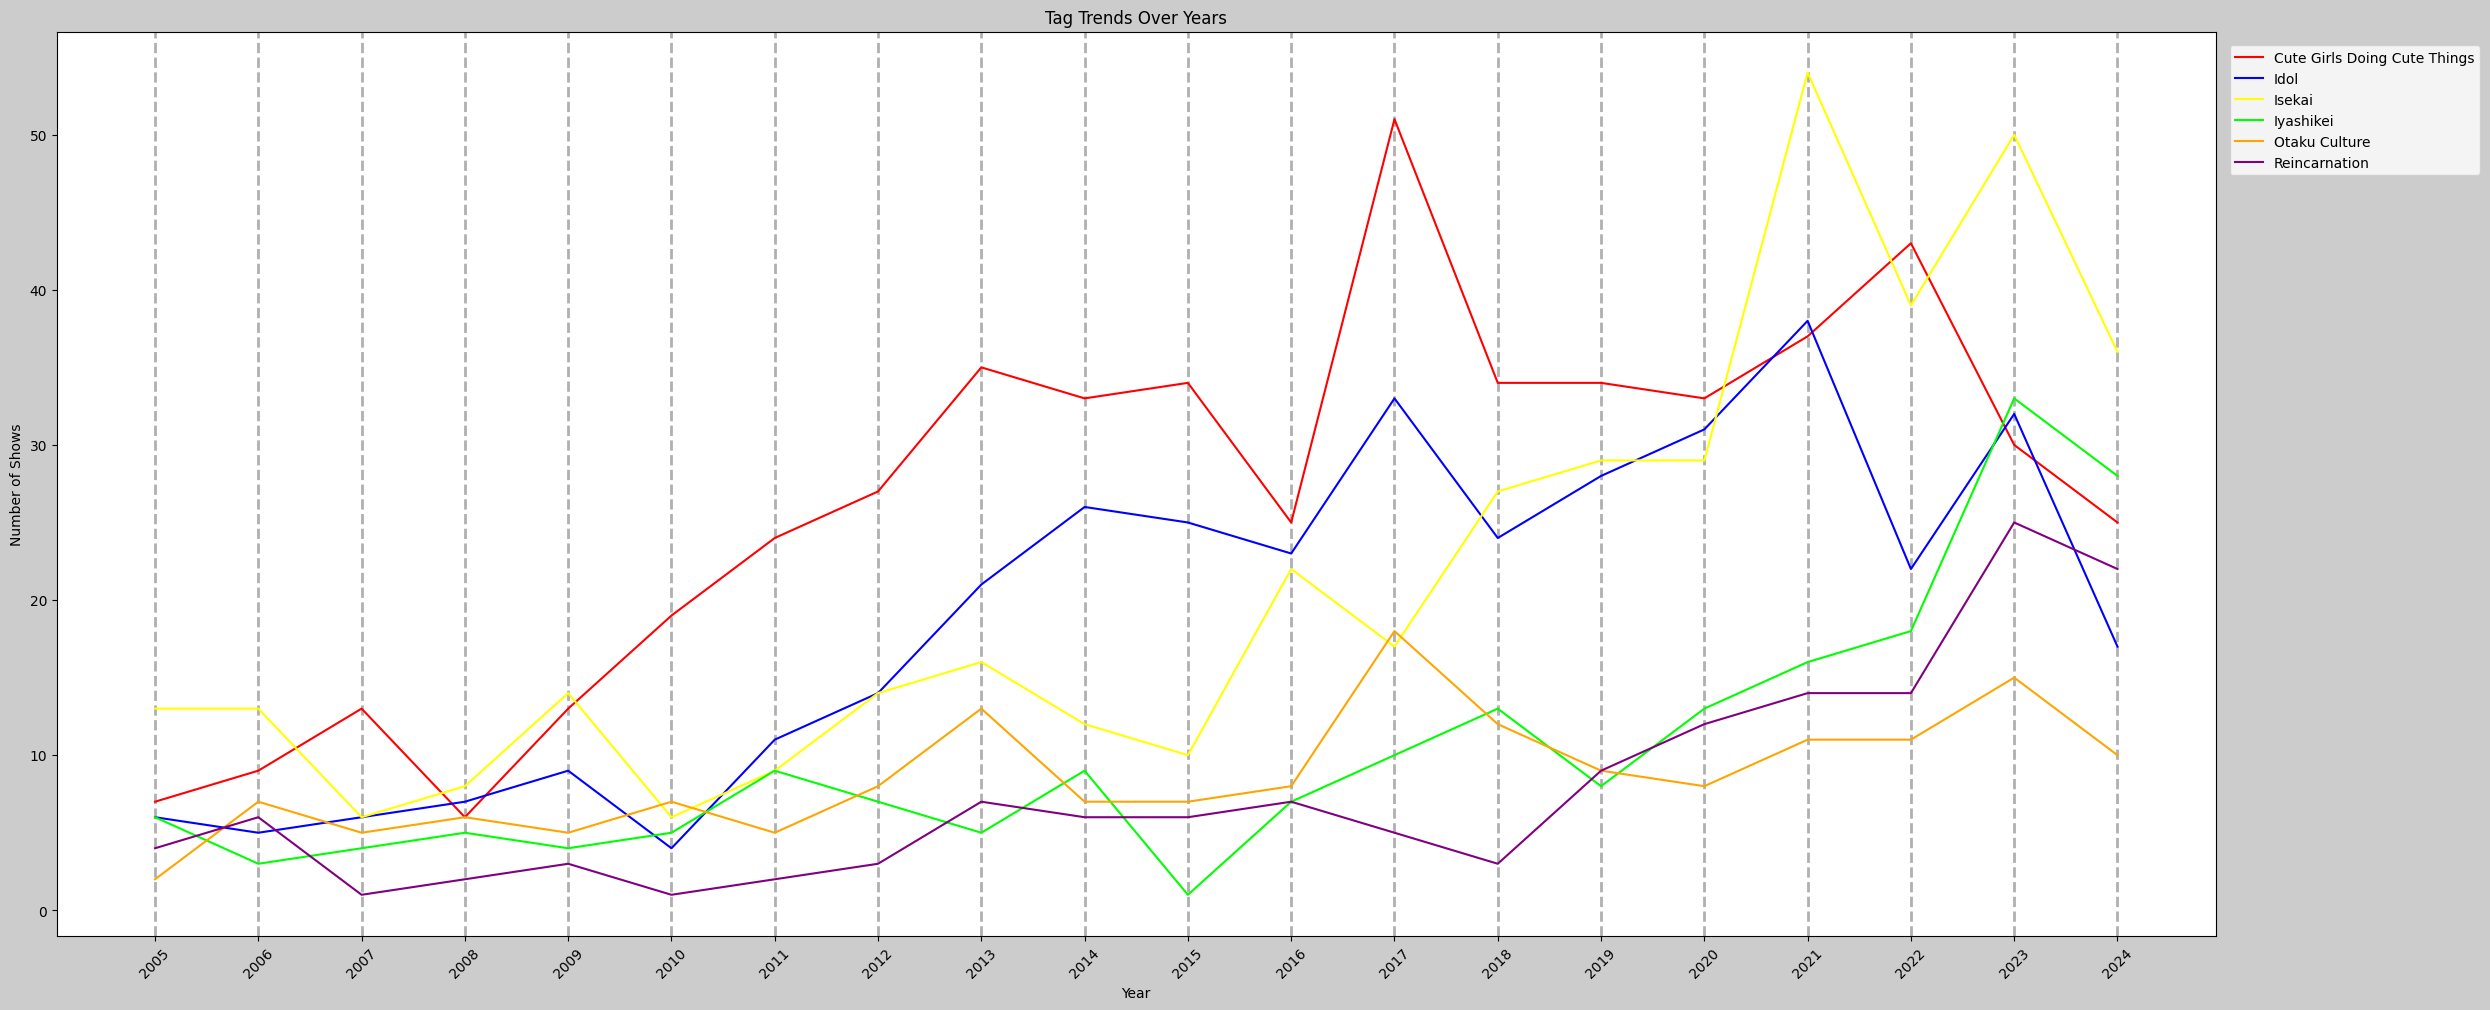

In [ ]:
# Pivot the data to have genres as columns and years as index
tag_trends = plot_df_2.pivot_table(values='title.english', index='seasonYear', columns='tag', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(tag_trends.columns):
    plt.plot(tag_trends.index, tag_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(tag_trends.index), max(tag_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

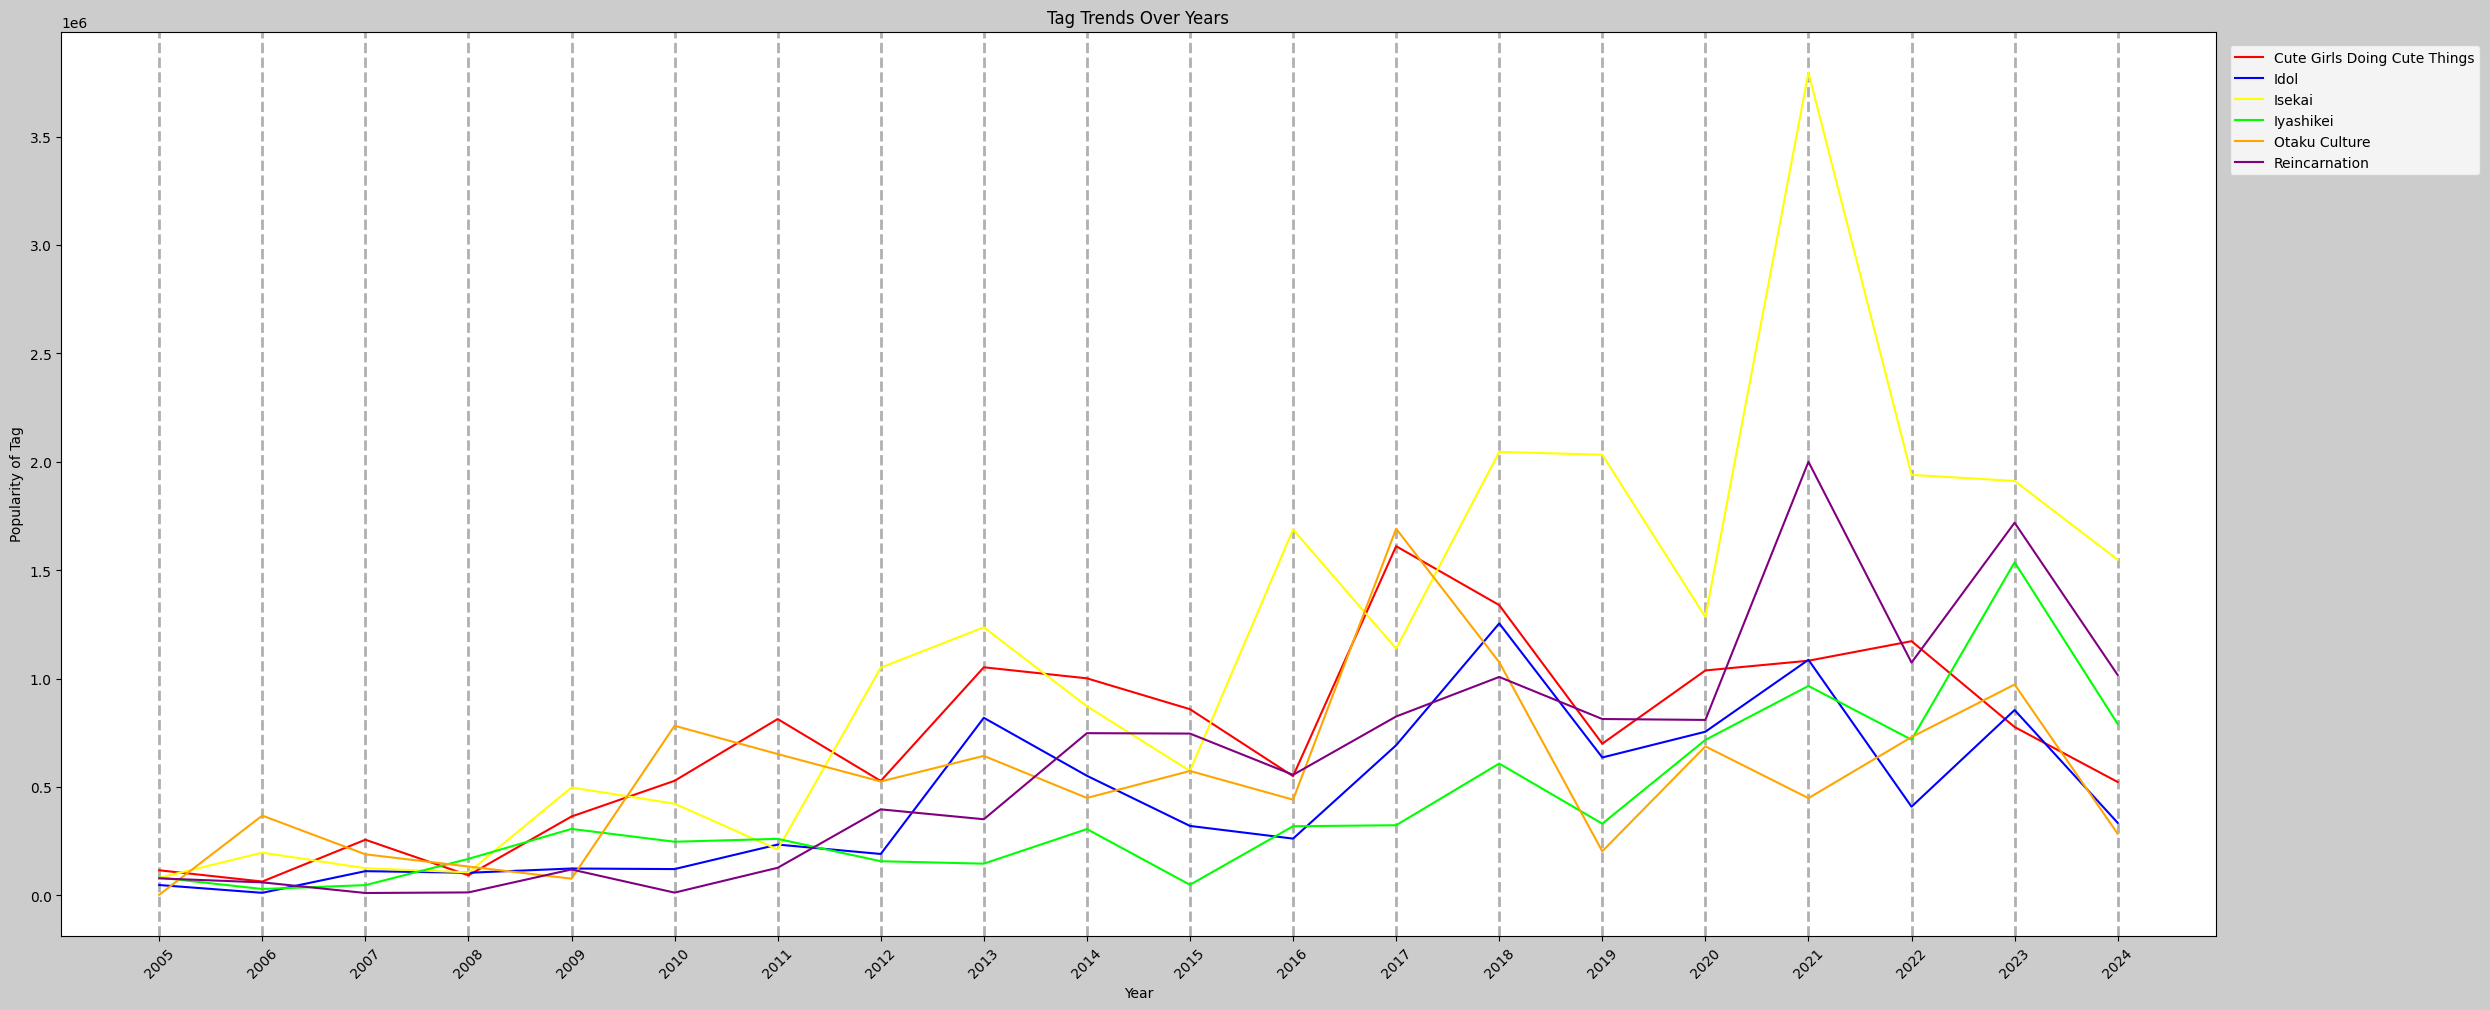

In [198]:
# Pivot the data to have genres as columns and years as index
tag_trends = plot_df_2.pivot_table(values='popularity', index='seasonYear', columns='tag', aggfunc='sum', fill_value=0)
colors = ['#FF0000','#0000FF','#FFFF00','#00FF00','#FFA500','#800080','#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(tag_trends.columns):
    plt.plot(tag_trends.index, tag_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity of Tag')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(tag_trends.index), max(tag_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [203]:
plot_df_3 = plot_df[plot_df['tag'] == 'Isekai']
plot_df_3 = plot_df_3[plot_df_3['seasonYear'] == 2021]
plot_df_3.sort_values(by='popularity', ascending=False)

,id,type,format,status,seasonYear,source,popularity,title.english,tag
1381,108465,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,338777,Mushoku Tensei: Jobless Reincarnation,Isekai
1385,108511,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,249134,That Time I Got Reincarnated as a Slime Season 2,Isekai
1588,124845,ANIME,TV,FINISHED,2021,ORIGINAL,241929,WONDER EGG PRIORITY,Isekai
1631,127720,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,240862,Mushoku Tensei: Jobless Reincarnation Cour 2,Isekai
1549,119661,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,229789,Re:ZERO -Starting Life in Another World- Seaso...,Isekai
1526,116742,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,205479,That Time I Got Reincarnated as a Slime Season...,Isekai
1659,129898,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,149939,The World's Finest Assassin Gets Reincarnated ...,Isekai
1367,107717,ANIME,TV,FINISHED,2021,MANGA,140844,Miss Kobayashi's Dragon Maid S,Isekai
1594,125206,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,121241,TSUKIMICHI -Moonlit Fantasy-,Isekai
1290,103632,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,120048,"So I'm a Spider, So What?",Isekai


In [206]:
plot_df_4 = plot_df[plot_df['tag'] == 'Isekai']
plot_df_4.sort_values(by='popularity', ascending=False).head(25)

,id,type,format,status,seasonYear,source,popularity,title.english,tag
584,11757,ANIME,TV,FINISHED,2012,LIGHT_NOVEL,590229,Sword Art Online,Isekai
933,21355,ANIME,TV,FINISHED,2016,LIGHT_NOVEL,484270,Re:ZERO -Starting Life in Another World-,Isekai
746,19815,ANIME,TV,FINISHED,2014,LIGHT_NOVEL,457954,"No Game, No Life",Isekai
907,21202,ANIME,TV,FINISHED,2016,LIGHT_NOVEL,421378,KONOSUBA -God's blessing on this wonderful world!,Isekai
444,6547,ANIME,TV,FINISHED,2010,ORIGINAL,375767,Angel Beats!,Isekai
1149,99263,ANIME,TV,FINISHED,2019,LIGHT_NOVEL,369572,The Rising of the Shield Hero,Isekai
1240,101280,ANIME,TV,FINISHED,2018,LIGHT_NOVEL,356845,That Time I Got Reincarnated as a Slime,Isekai
1381,108465,ANIME,TV,FINISHED,2021,LIGHT_NOVEL,338777,Mushoku Tensei: Jobless Reincarnation,Isekai
664,15809,ANIME,TV,FINISHED,2013,LIGHT_NOVEL,337078,The Devil is a Part-Timer!,Isekai
851,20832,ANIME,TV,FINISHED,2015,LIGHT_NOVEL,322661,Overlord,Isekai


In [3]:
new_df = pd.read_csv("complete_anilist.csv")